# Analiza zmian wartości cząsteczek PM10 miast Pomorza Zachodniego dla lat 2010 i 2020

### Mateusz Rydzik, 2022

Spis treści:
1. [wstęp](#wstep)
2. [przygotowanie danych](#przyg_dan)
3. [podstawowe informacje o danych](#info)
4. [analiza PM10 dla poszczególnych lat](#lata)
5. [analiza PM10 dla poszczególnych miast](#miasta)
6. [analiza zmian PM10 na przestrzeni lat](#zmiany)
7. [podsumowanie](#sum)

<h2 id="wstep">1. wstęp</h2>

Celem pracy jest obserwacja potencjalnych zmian zawartości cząsteczek PM10 w powietrzu w ujęciu czasowym. W ramach pracy, wybrany został obszar Pomorza Zachodniego. Do dokładniejszej analizy przygotowane dane dla miast Szczecin, Szczecinek oraz Koszalin. Jako zakres czasowy wybrane zostały dwa lata, których wartości zostały poddane dalszej analizie: 2010, 2020. Wartości zostały zapisane w jednostce mikrogramów na metr sześcienny µg/m3


<h2 id="przyg_dan">2. przygotowywanie danych</h2>

Do poprawnego przygotowania danych dla dalszej analizy, wykorzystane zostały biblioteki pandas oras numpy. Do wizualizacji danych wykorzystano bibliotekę PollutionPlotter. Dla formatowania ramek danych jako tabele, posłużono się pakietem IPython.

In [1]:
import pandas as pd
import numpy as np
from py_pollution.pollutionplotter import PollutionPlotter
from IPython.display import display
import matplotlib.pyplot as plt

Dane wejściowe zostały udostępnione przez Główny Inspektorat Ochrony Środowiska. Przed załadowaniem usunięto zbędne nagłówki oraz elementy opisowe zbiorów.

In [2]:
zp2010 = pd.read_csv("data/zachpom_2010_pm10.csv", sep=";")
zp2020 = pd.read_csv("data/zachpom_2020_pm10.csv", sep=";")

Na potrzebę dalszych analiz, zbiory danych zagregowano dla poszczególnych mięsiecy. Wyliczono także średnie roczne wartości PM10 wszystkich miast dla lat 2010 i 2020

In [3]:
zp2010['Month'] = pd.to_datetime(zp2010['Date'])
mean_month10 = zp2010.groupby(zp2010['Month'].dt.strftime('%B')).mean()
mean_month10['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
mean_month10.reset_index(inplace=True)
mean_month10.set_index('month_order', inplace=True)
mean_month10.sort_index(inplace=True)

/var/folders/bn/0w4p7_2d1dz9438_cmgrn6600000gn/T/ipykernel_96443/2939582919.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_month10 = zp2010.groupby(zp2010['Month'].dt.strftime('%B')).mean()


In [4]:
zp2020['Month'] = pd.to_datetime(zp2020['Date'])
mean_month20 = zp2020.groupby(zp2020['Month'].dt.strftime('%B')).mean()
mean_month20['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
mean_month20.reset_index(inplace=True)
mean_month20.set_index('month_order', inplace=True)
mean_month20.sort_index(inplace=True)

/var/folders/bn/0w4p7_2d1dz9438_cmgrn6600000gn/T/ipykernel_96443/2701777695.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_month20 = zp2020.groupby(zp2020['Month'].dt.strftime('%B')).mean()


In [5]:
city_names = ['Szczecin', 'Koszalin', 'Szczecinek']
mean_year10 = zp2010[city_names].mean().mean()
mean_year20 = zp2020[city_names].mean().mean()

<h2 id="info">3. podstawowe informacje o danych</h2>

In [6]:
display(zp2010.describe())

,Koszalin,Szczecinek,Szczecin
count,365.000000,365.000000,361.000000
mean,24.964932,34.755890,32.868421
std,16.581392,22.185794,19.766838
min,3.300000,6.600000,7.000000
25%,14.700000,19.700000,19.000000
50%,19.900000,28.500000,26.800000
75%,30.500000,42.100000,39.900000
max,151.100000,156.100000,148.600000


Sposród trzech wybranych miast Pomorza Zachodniego w 2010 roku, najwyższą średnią wartością PM10 cechował się Szczecinek. Wynosiła ona aż o niemal 10 µg/m3 więcej niż w Koszalinie, i o niecałe 2 µg/m3 więcej niż w Szczecinie. Szczecinek cechował się także największym odchyleniem standardowym i największą zaobserwowaną wartością maksymalną spośród pozostałych miast.

In [7]:
display(zp2020.describe())

,Szczecinek,Szczecin,Koszalin
count,366.000000,366.000000,346.000000
mean,18.818852,24.160109,15.279480
std,10.544624,10.964333,7.207457
min,4.200000,6.000000,2.700000
25%,11.600000,16.950000,10.600000
50%,15.900000,21.800000,13.700000
75%,23.350000,29.150000,18.350000
max,70.400000,77.300000,52.400000


W porównaniu z poprzednim rokiem, w 2020 średnie wartości PM10 zmalały w każdym z miast. Największy spadek zanotowano w Szczecinku, gdzie średnia wartość zanieczyszczeń spadła o ponad 16 µg/m3. Zauważalne są także mniejsze odchylenia standardowe w miastach Pomorza Zachodniego.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


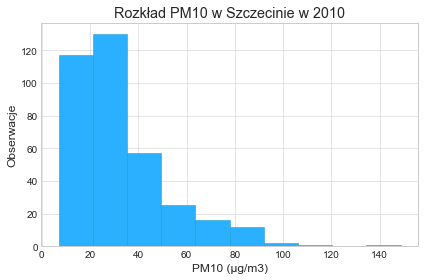

In [17]:
hist = PollutionPlotter()

config = {
    "title": "Rozkład PM10 w Szczecinie w 2010",
    "ylabel": "Obserwacje",
    "xlabel": "PM10 (µg/m3)",
    "avgline": None,
    "legend": "upper right",
    "xticks": 0
}

hist.set_style('seaborn-whitegrid')
hist.hist(zp2010['Szczecin'], 10, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
hist.format(config)
hist.show()

Większość obserwacji PM10 oscyluje w granicach 10-40 µg/m3. Rozkład wartości, na przykładzie Szczecina w 2010 roku, charakteryzuje się rozkładem prawoskośnym, dla którego przeważają jednostki o niskich PM10.

<h2 id="lata">4. analiza PM10 dla poszczególnych lat</h2>

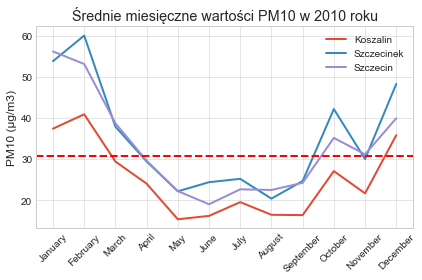

In [25]:
plot2010 = PollutionPlotter()

config.update({"title": "Średnie miesięczne wartości PM10 w 2010 roku",
              "avgline": mean_year10,
              "xticks": 45})

plot2010.set_style('seaborn-whitegrid')

plot2010.plot(
    mean_month10.Month, 
    mean_month10.Koszalin, 
    label="Koszalin")

plot2010.plot(
    mean_month10.Month, 
    mean_month10.Szczecinek, 
    label="Szczecinek")

plot2010.plot(
    mean_month10.Month, 
    mean_month10.Szczecin, 
    label="Szczecin")

plot2010.format(config)
plot2010.show()

Dla wszystkich miast, najwyższe wartości PM10 przypadały w miesiącach zimowych. Od grudnia do marca, w każdym z miast średnie miesięczne przekraczały średnią roczną wartość PM10 dla tych miast. Szczecin posiada podobny rozkład wartości ze Szczecinkiem. Drugie z tych miast wyróżnia się jedynie w październiku oraz grudniu, posiadając znacznie wyższe wartości. Koszalin odstaje od tej pary z niższymi wartościami µg/m3. Dla tego miasta, średnie miesięczne wartości PM10 przekroczyły średnią roczną tylko trzy razy, co dla pozostałych miast wystąpiło dwukrotnie częściej.

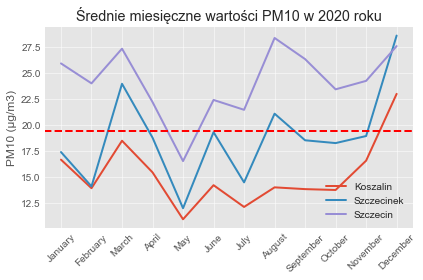

In [26]:
plot2020 = PollutionPlotter()


config.update({
    "title": "Średnie miesięczne wartości PM10 w 2020 roku",
    "avgline": mean_year20,
    "legend": "lower right"
})

plot2020.set_style('ggplot')

plot2020.plot(
    mean_month20.Month,
    mean_month20.Koszalin,
    label="Koszalin")

plot2020.plot(
    mean_month20.Month,
    mean_month20.Szczecinek,
    label="Szczecinek")

plot2020.plot(
    mean_month20.Month,
    mean_month20.Szczecin,
    label="Szczecin")

plot2020.format(config)
plot2020.show()

Porównując wykres dla roku 2020 z poprzednim, dla 2010, zauważyć można podobny przebieg zmian wartości dla wszystkich miast, różniąc się jedynie ich wartościami. W tym roku, jedynie dla Szczecina wartości PM10 przewyższają średnią roczną wartość dla trzech miast. Zauważalna jest też, na pierwszy widok, chaotyczność linii przebiegu zmian. Najwyższe wartości dla każdego z miast odnotowano w marcu, sierpniu i grudniu.

<h2 id="miasta">5. analiza PM10 dla poszczególnych miast</h2>

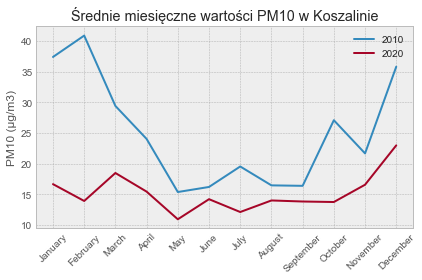

In [27]:
plotKoszalin = PollutionPlotter()

config.update({
    "title": "Średnie miesięczne wartości PM10 w Koszalinie",
    "avgline": None,
    "legend": "upper right"
})

plotKoszalin.set_style('bmh')

plotKoszalin.plot(
    mean_month10.Month,
    mean_month10.Koszalin, 
    label="2010")

plotKoszalin.plot(
    mean_month20.Month,
    mean_month20.Koszalin, 
    label="2020")

plotKoszalin.format(config)
plotKoszalin.show()

Wraz z upływem dekady, wartości PM10 w Koszalinie znacznie zmalały. Linia przebiegu zmian wartości w 2020 posiada także mniejsze odchylenia.

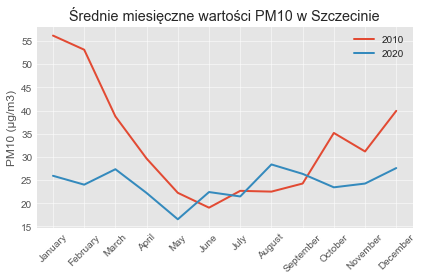

In [28]:
plotSzczecin = PollutionPlotter()

config.update({
    "title": "Średnie miesięczne wartości PM10 w Szczecinie",
})

plotSzczecin.set_style("ggplot")

plotSzczecin.plot(
    mean_month10.Month,
    mean_month10.Szczecin,
    label="2010")

plotSzczecin.plot(
    mean_month20.Month,
    mean_month20.Szczecin,
    label="2020")

plotSzczecin.format(config)
plotSzczecin.show()

Podobnie jak dla Koszalina, różnice zmian wartości w 2020 są mniejsze niż w 2010. Występują jednak miesiące, dla których wartości PM10 osiągają większe wartości w 2020 niż w 2010 (czerwiec, sierpień i wrzesień).

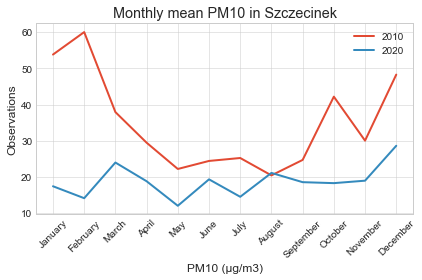

In [13]:
plotSzczecinek = PollutionPlotter()

config.update({
    "title": "Średnie miesięczne wartości PM10 w Szczecinku"
})

plotSzczecinek.set_style('seaborn-whitegrid')

plotSzczecinek.plot(
    mean_month10.Month,
    mean_month10.Szczecinek,
    label="2010")


plotSzczecinek.plot(
    mean_month20.Month,
    mean_month20.Szczecinek,
    label="2020")

plotSzczecinek.format(config)
plotSzczecinek.show()

Tak samo jak dla pozostałych miast, rok 2020 przyniósł znaczne obniżenie obserwowanych wartości PM10 w Szczecinku, porównując je z rokiem 2010. Jedynym wyjątkiem jest sierpień, gdzie w obydwu latach PM10 wyniosły podobną wartość µg/m3. 

<h2 id="zmiany">6. analiza zmian PM10 na przestrzeni lat</h2>

In [14]:
xlabel = ['Koszalin', 'Szczecin', 'Szczecinek']
mean_city2010 = [zp2010.Koszalin.mean(), 
                 zp2010.Szczecin.mean(),
                 zp2010.Szczecinek.mean()]

mean_city2020 = [zp2020.Koszalin.mean(),
                 zp2020.Szczecin.mean(),
                 zp2020.Szczecinek.mean()]

x_axis = np.arange(len(xlabel))

W celu zestawienia zmian PM10 w skali rocznej, konieczne jest obliczenie średnich rocznych wartości dla każdych miast w obydwu latach.

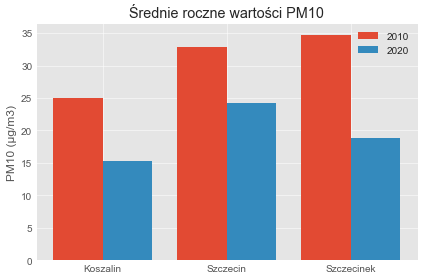

In [29]:
meanplots = PollutionPlotter()

config.update({
    "title": "Średnie roczne wartości PM10",
    "ylabel": "PM10 (µg/m3)",
    "xlabel": "",
    "xticks": 0
    
})

meanplots.set_style('ggplot')

meanplots.bar(
    x_axis - 0.2,  
    mean_city2010,
    0.4,
    x_axis,
    xlabel,
    "2010")

meanplots.bar(
    x_axis + 0.2,
    mean_city2020,
    0.4,
    x_axis,
    xlabel,
    "2020")

meanplots.format(config)

meanplots.show()

Największą różnicę, spośród trzech badanych miast, w zaobserwowanych wartościach PM10 odnotowano dla Szczecinka, gdzie wynosiła ona ponad 15 µg/m3. Po upływie 10 lat, Szczecin posiadał najwyższe obserwowane wartości PM10. Były one jednak nadal niższe od poziomu PM10 zanotowanego w Koszalinie w 2010, które były w tamtym roku najniższe w porównaniu z pozostałymi miastami. Koszalin nadal pozostał miastem z najniższymi wartościami PM10.

<h2 id="sum"> 7. podsumowanie</h2>

Wyniki przeprowadzonych analiz pokazują złożoność problemu zanieczyszczeń powietrza. Szczecinek, najmniejsze miasto spośród pozostałych pod względem populacji, odnotowało najwyższe wartości PM10 w 2010 roku. Zjawisko wysokiego poziomu zanieszczyneń powietrza, który najczęściej jest przypisywany gęsto zaludnionym miastom, wynikało z funkcjonowania zakładów przemysłowych na terenie miasta. Koszalin, drugie największe miasto województwa zachodniopomorskiego, posiadało znacznie mniejsze wyniki od Szczecina, stolicy Pomorza Zachodniego. Nadmorskie położenia miasta pozytywnie wpłynęło na obniżenie wartości PM10 w powietrzu.

Mimo tych różnic, każde z miast po upływie 10 lat zanotowało obniżenie obserwowanej zawartości PM10 w powietrzu. Jest to pozytywny sygnał, świadczący o skuteczności podejmowanych w ostatnich latach programów ochrony środowiska oraz ograniczenia emisji zanieczyszczeń do powietrza.